In [ ]:
import matplotlib.font_manager as fm
#fm.fontManager.ttflist #설치된 폰트 리스트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,559 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

In [ ]:
import pandas as pd
import numpy as np

#시각화 관련된 코드
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["font.family"]="NanumGothic"
plt.rcParams["font.size"]=13

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


excel 파일로된 데이터 셋을 csv로 바꾸는 코드

In [ ]:
#excel_data= "/content/drive/MyDrive/데수프팀플/등록금 현황.xlsx"
#csv_data = "/content/drive/MyDrive/데수프팀플/등록금 현황.csv"
#df = pd.read_excel(excel_data)
#df.to_csv(csv_data, index=False)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/데수프팀플/등록금 현황.csv",na_values=0.0,encoding='utf-8',skiprows=[0,1,2,4])
data

,기준연도,학교종류,설립구분,지역,상태,학교,입학금\n(A),수업료\n(B),등록금\n(D=B),인문사회,자연과학,예체능,공학,의학
0,2021,대학교,사립,경남,기존,가야대학교(김해),120000.0,6758560.2,6758560.2,5849683.7,7206556.7,NaN,NaN,NaN
1,2021,대학교,사립,경기,기존,가천대학교,318000.0,8249738.7,8249738.7,7098467.3,8283509.9,9177055.6,9076000.0,9890000.0
2,2021,대학교,사립,강원,기존,가톨릭관동대학교,154000.0,7165673.8,7165673.8,6157422.8,7459344.9,8218086.6,8135562.7,9850000.0
3,2021,대학교,사립,충북,기존,가톨릭꽃동네대학교,NaN,7152463.0,7152463.0,6618000.0,7796000.0,NaN,NaN,NaN
4,2021,대학교,사립,경기,기존,가톨릭대학교,316600.0,6964630.1,6964630.1,6122000.0,7454336.6,8562000.0,8284000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021,산업대학,사립,전북,기존,호원대학교,94000.0,6929052.0,6929052.0,5814127.5,7148930.2,7484849.1,6999745.6,NaN
241,2021,대학교,사립,서울,기존,홍익대학교,358400.0,8315003.9,8315003.9,6848000.0,6848000.0,9070658.5,8810861.6,NaN
242,2021,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,358400.0,8443408.1,8443408.1,6848000.0,NaN,8984000.0,8799536.4,NaN
243,2021,대학교,사립,경기,기존,화성의과학대학교,306000.0,6986129.1,6986129.1,6526100.0,7424894.3,6982754.7,NaN,NaN


## 1. 데이터 전처리

1) 전문대, 대학원등은 제외하고 4년제 대학교를 대상으로 확인

In [ ]:
data = data[data['학교종류'] == '대학교']
data = data.reset_index()
data

,index,기준연도,학교종류,설립구분,지역,상태,학교,입학금\n(A),수업료\n(B),등록금\n(D=B),인문사회,자연과학,예체능,공학,의학
0,0,2021,대학교,사립,경남,기존,가야대학교(김해),120000.0,6758560.2,6758560.2,5849683.7,7206556.7,NaN,NaN,NaN
1,1,2021,대학교,사립,경기,기존,가천대학교,318000.0,8249738.7,8249738.7,7098467.3,8283509.9,9177055.6,9076000.0,9890000.0
2,2,2021,대학교,사립,강원,기존,가톨릭관동대학교,154000.0,7165673.8,7165673.8,6157422.8,7459344.9,8218086.6,8135562.7,9850000.0
3,3,2021,대학교,사립,충북,기존,가톨릭꽃동네대학교,NaN,7152463.0,7152463.0,6618000.0,7796000.0,NaN,NaN,NaN
4,4,2021,대학교,사립,경기,기존,가톨릭대학교,316600.0,6964630.1,6964630.1,6122000.0,7454336.6,8562000.0,8284000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,238,2021,대학교,사립,광주,기존,호남신학대학교,99200.0,6686101.4,6686101.4,5770956.1,NaN,7936800.0,NaN,NaN
208,239,2021,대학교,사립,충남,기존,호서대학교,150000.0,7724277.6,7724277.6,6825340.8,7733012.9,8219724.7,8264385.0,NaN
209,241,2021,대학교,사립,서울,기존,홍익대학교,358400.0,8315003.9,8315003.9,6848000.0,6848000.0,9070658.5,8810861.6,NaN
210,242,2021,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,358400.0,8443408.1,8443408.1,6848000.0,NaN,8984000.0,8799536.4,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      212 non-null    int64  
 1   기준연도       212 non-null    int64  
 2   학교종류       212 non-null    object 
 3   설립구분       212 non-null    object 
 4   지역         212 non-null    object 
 5   상태         212 non-null    object 
 6   학교         212 non-null    object 
 7   입학금
(A)    166 non-null    float64
 8   수업료
(B)    211 non-null    float64
 9   등록금
(D=B)  211 non-null    float64
 10  인문사회       198 non-null    float64
 11  자연과학       167 non-null    float64
 12  예체능        166 non-null    float64
 13  공학         159 non-null    float64
 14  의학         47 non-null     float64
dtypes: float64(8), int64(2), object(5)
memory usage: 25.0+ KB


In [ ]:
#data.describe(include = 'all')

In [ ]:
data.columns

Index(['index', '기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금\n(A)',
       '수업료\n(B)', '등록금\n(D=B)', '인문사회', '자연과학', '예체능', '공학', '의학'],
      dtype='object')

2) 무의미한 컬럼: 기준연도, 입학금 제외

In [ ]:
#무의미한 컬럼
data.drop(['기준연도','입학금\n(A)'],axis=1,inplace=True)

3)문과,자연과학,공학대학이 모두 있는 종합대학만 고려

In [ ]:
#종합대학만 보겠다
data.drop(['의학','예체능'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['index', '학교종류', '설립구분', '지역', '상태', '학교', '수업료\n(B)', '등록금\n(D=B)',
       '인문사회', '자연과학', '공학'],
      dtype='object')

4) 결측치가 많은 행 제거

In [ ]:
data.isnull().sum()

index          0
학교종류           0
설립구분           0
지역             0
상태             0
학교             0
수업료\n(B)       1
등록금\n(D=B)     1
인문사회          14
자연과학          45
공학            53
dtype: int64

In [ ]:
data=data.dropna(axis=0)
data.head()

,index,학교종류,설립구분,지역,상태,학교,수업료\n(B),등록금\n(D=B),인문사회,자연과학,공학
1,1,대학교,사립,경기,기존,가천대학교,8249738.7,8249738.7,7098467.3,8283509.9,9076000.0
2,2,대학교,사립,강원,기존,가톨릭관동대학교,7165673.8,7165673.8,6157422.8,7459344.9,8135562.7
4,4,대학교,사립,경기,기존,가톨릭대학교,6964630.1,6964630.1,6122000.0,7454336.6,8284000.0
9,9,대학교,국립,강원,기존,강릉원주대학교,4253234.2,4253234.2,3488000.0,4301374.9,4616000.0
10,10,대학교,국립,강원,기존,강릉원주대학교 _제2캠퍼스,4290340.0,4290340.0,3488000.0,4298000.0,4616000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 209
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      141 non-null    int64  
 1   학교종류       141 non-null    object 
 2   설립구분       141 non-null    object 
 3   지역         141 non-null    object 
 4   상태         141 non-null    object 
 5   학교         141 non-null    object 
 6   수업료
(B)    141 non-null    float64
 7   등록금
(D=B)  141 non-null    float64
 8   인문사회       141 non-null    float64
 9   자연과학       141 non-null    float64
 10  공학         141 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 13.2+ KB


5) 사립대학만 고려

In [ ]:
#국공립 대학과 사립대학의 등록금 차이가 크기 때문에 사립으로만 비교
group_data = data.groupby(["설립구분"])
data_sa=group_data.get_group('사립')

#지역에 따른 값

In [ ]:
data_sa.groupby(["지역"]).mean()

<ipython-input-14-336233347742>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sa.groupby(["지역"]).mean()


,index,수업료\n(B),등록금\n(D=B),인문사회,자연과학,공학
지역,,,,,,
강원,120.000000,7.536443e+06,7.536443e+06,6.647051e+06,7.798808e+06,8.441552e+06
경기,133.166667,7.873358e+06,7.873358e+06,6.825607e+06,8.190025e+06,8.668421e+06
경남,148.400000,6.654106e+06,6.654106e+06,5.638574e+06,6.945445e+06,7.439073e+06
경북,86.250000,7.268526e+06,7.268526e+06,6.129737e+06,7.733880e+06,7.889740e+06
광주,130.800000,6.632963e+06,6.632963e+06,5.887877e+06,6.891446e+06,7.095200e+06
대구,35.000000,7.187091e+06,7.187091e+06,5.984912e+06,7.882609e+06,8.238000e+06
대전,108.000000,7.203872e+06,7.203872e+06,6.446898e+06,7.282843e+06,7.764020e+06
부산,83.142857,6.749633e+06,6.749633e+06,5.682602e+06,7.083380e+06,7.627382e+06
서울,121.043478,7.975213e+06,7.975213e+06,6.931318e+06,8.187118e+06,8.802986e+06


6) 지역별로 대학교의 수가 적기 때문에 일반화를 위해 대학교가 5개 초과인 지역만 고려

In [ ]:
df = data_sa.groupby('지역').filter(lambda x: len(x) > 5)
df.groupby('지역').count()

,index,학교종류,설립구분,상태,학교,수업료\n(B),등록금\n(D=B),인문사회,자연과학,공학
지역,,,,,,,,,,
경기,18,18,18,18,18,18,18,18,18,18
경북,12,12,12,12,12,12,12,12,12,12
대전,6,6,6,6,6,6,6,6,6,6
부산,7,7,7,7,7,7,7,7,7,7
서울,23,23,23,23,23,23,23,23,23,23
충남,9,9,9,9,9,9,9,9,9,9
충북,7,7,7,7,7,7,7,7,7,7


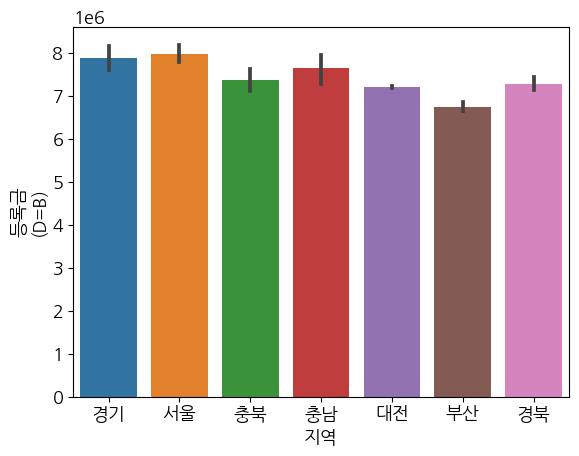

In [ ]:
sns.barplot(x="지역",y="등록금\n(D=B)",data=df)
plt.show()

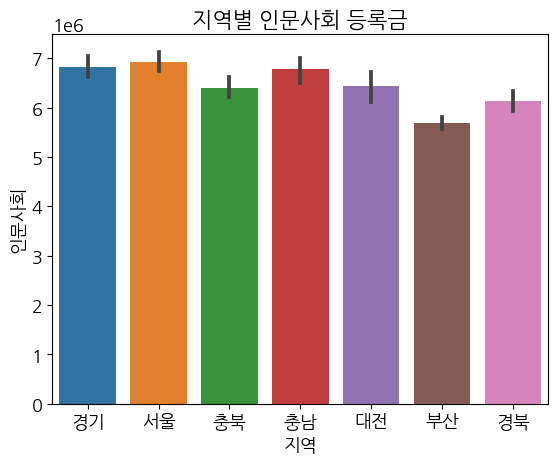

In [ ]:
sns.barplot(x="지역",y="인문사회",data=df)
plt.title("지역별 인문사회 등록금")
plt.show()

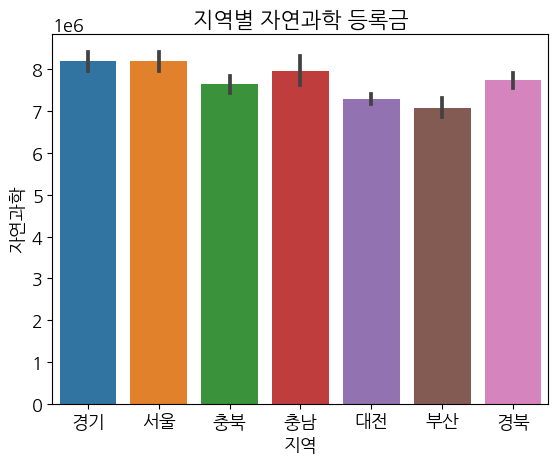

In [ ]:
sns.barplot(x="지역",y="자연과학",data=df)
plt.title("지역별 자연과학 등록금")
plt.show()

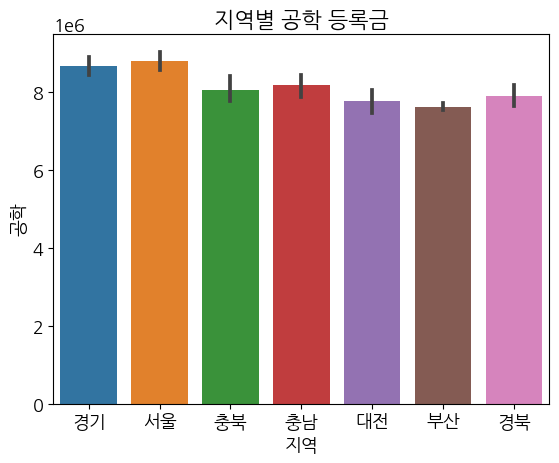

In [ ]:
sns.barplot(x="지역",y="공학",data=df)
plt.title("지역별 공학 등록금")
plt.show()

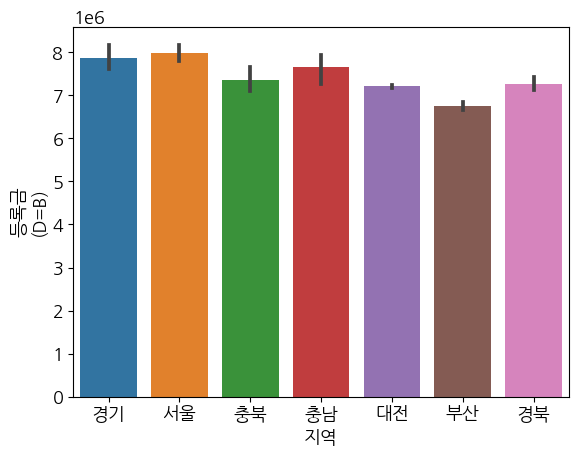

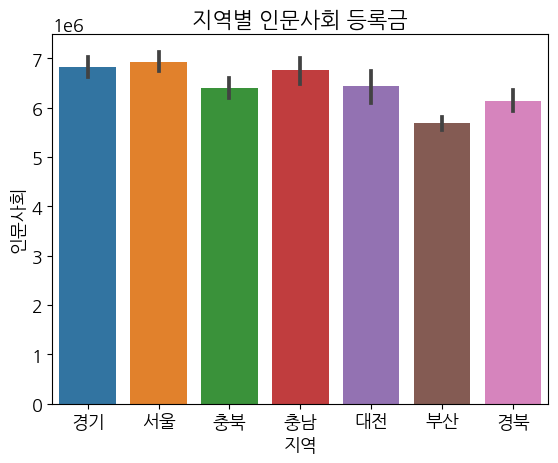

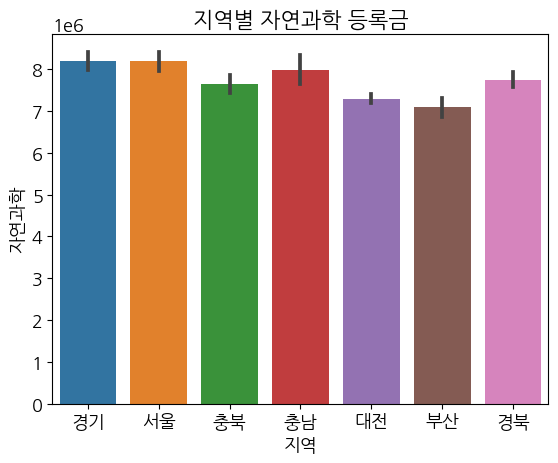

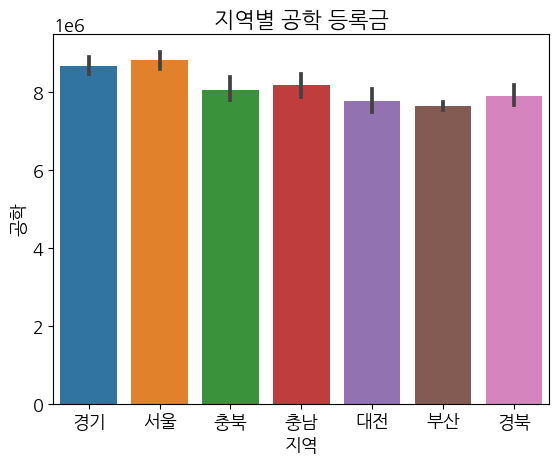

In [ ]:
sns.barplot(x="지역",y="등록금\n(D=B)",data=df)
plt.show()
sns.barplot(x="지역",y="인문사회",data=df)
plt.title("지역별 인문사회 등록금")
plt.show()
sns.barplot(x="지역",y="자연과학",data=df)
plt.title("지역별 자연과학 등록금")
plt.show()
sns.barplot(x="지역",y="공학",data=df)
plt.title("지역별 공학 등록금")
plt.show()

<Axes: xlabel='지역'>

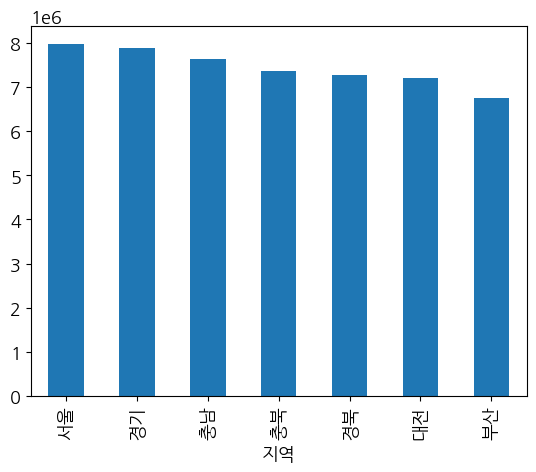

In [ ]:
g=df.groupby(["지역"])["등록금\n(D=B)"].mean().sort_values(ascending = False)
g.plot.bar()

<Axes: xlabel='지역'>

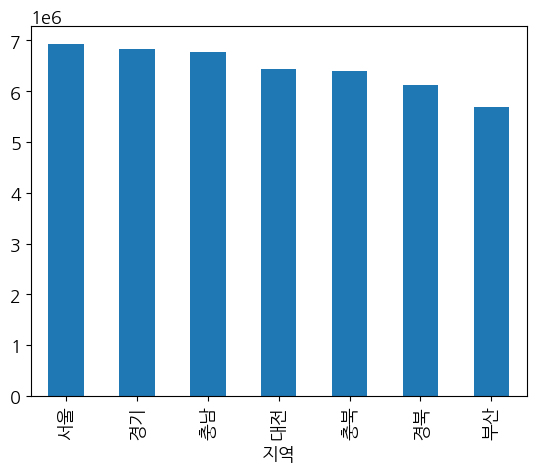

In [ ]:
g=df.groupby(["지역"])["인문사회"].mean().sort_values(ascending = False)
g.plot.bar()

<Axes: xlabel='지역'>

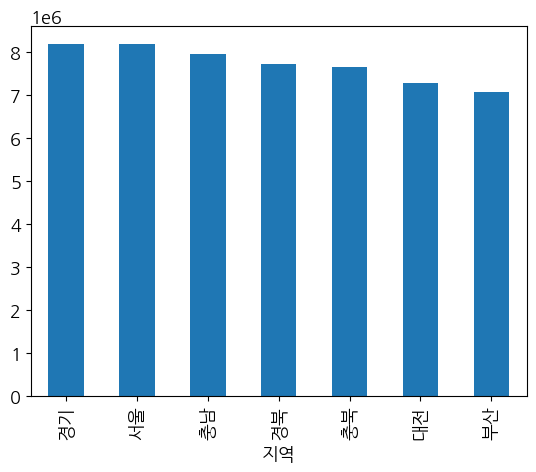

In [ ]:
g=df.groupby(["지역"])["자연과학"].mean().sort_values(ascending = False)
g.plot.bar()

<Axes: xlabel='지역'>

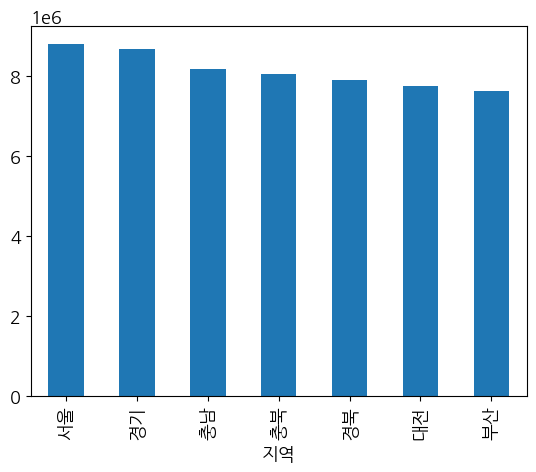

In [ ]:
g=df.groupby(["지역"])["공학"].mean().sort_values(ascending = False)
g.plot.bar()

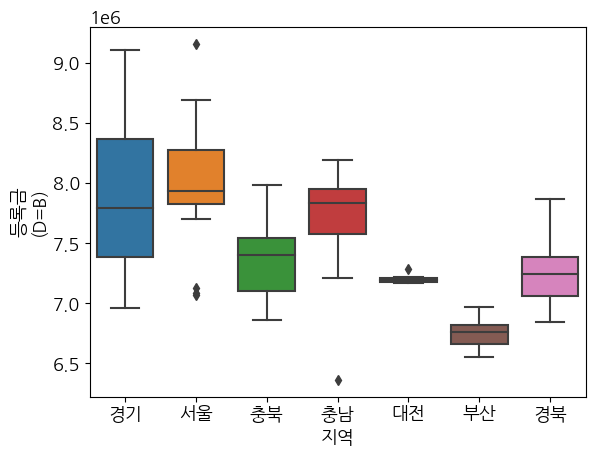

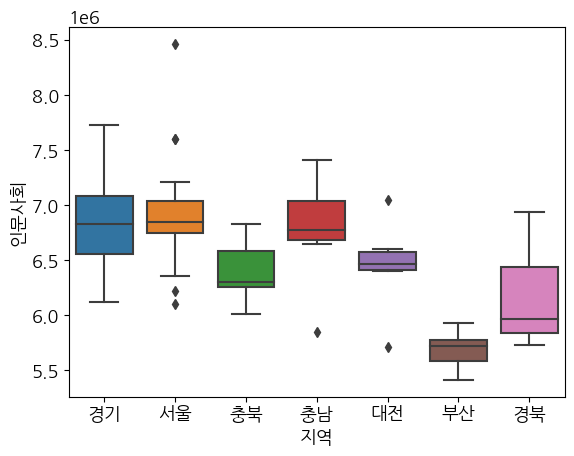

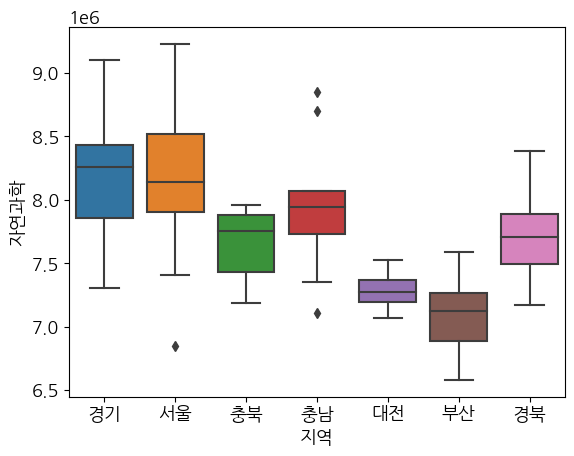

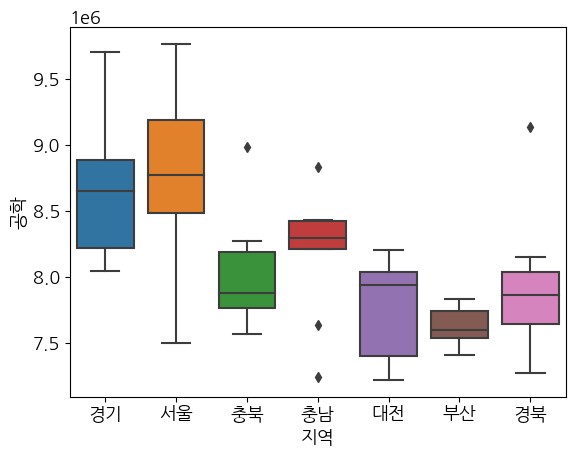

In [ ]:
sns.boxplot(y="등록금\n(D=B)",x="지역",data=df)
plt.show()
sns.boxplot(y="인문사회",x="지역",data=df)
plt.show()
sns.boxplot(y="자연과학",x="지역",data=df)
plt.show()
sns.boxplot(y="공학",x="지역",data=df)
plt.show()

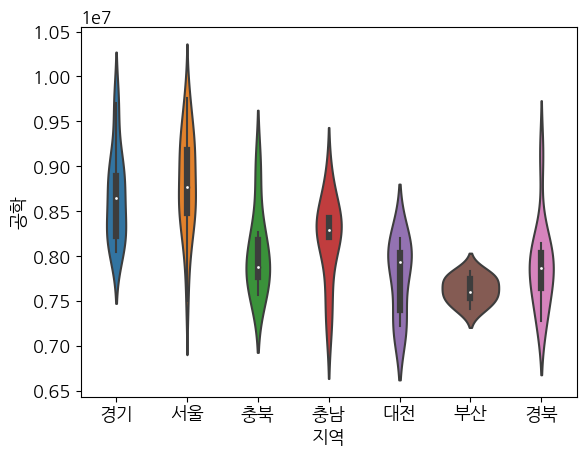

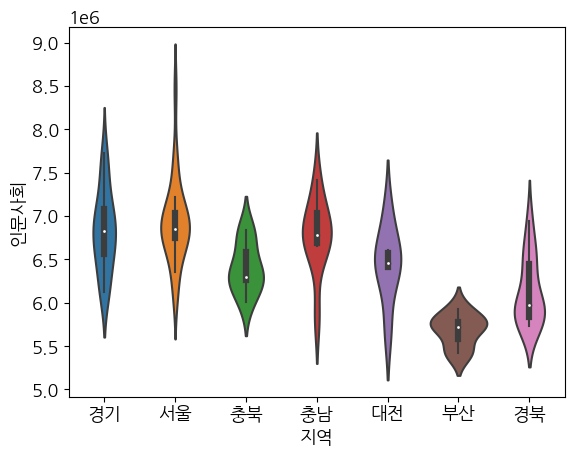

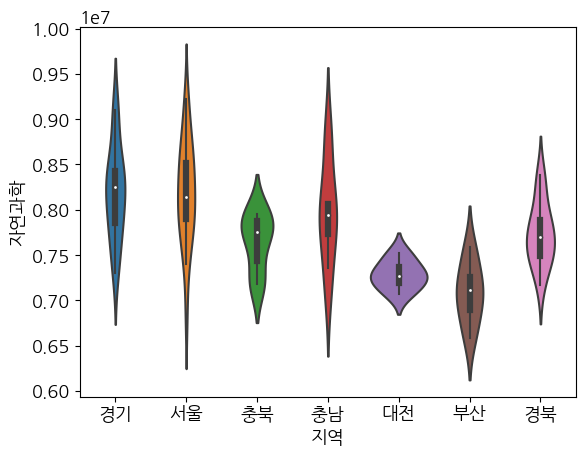

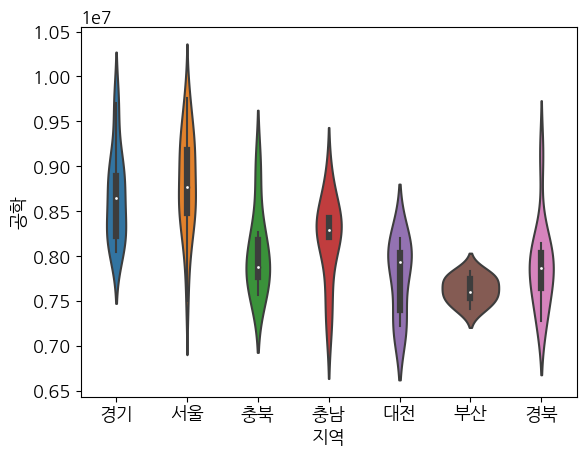

In [ ]:
sns.violinplot(y="공학",x="지역",data=df)
plt.show()
sns.violinplot(y="인문사회",x="지역",data=df)
plt.show()
sns.violinplot(y="자연과학",x="지역",data=df)
plt.show()
sns.violinplot(y="공학",x="지역",data=df)
plt.show()

#2.장학금

excel을 csv로 바꾸는

In [ ]:
#excel_data= "/content/drive/MyDrive/데수프팀플/장학금 수혜 현황.xlsx"
#csv_data = "/content/drive/MyDrive/데수프팀플/장학금 수혜 현황.csv"
#df = pd.read_excel(excel_data)
#df.to_csv(csv_data, index=False)

In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/데수프팀플/장학금 수혜 현황.csv",na_values=0.0,encoding='utf-8',skiprows=[0,1,2,4])
#data

#csv의 형태가 독특하기때문에 리네임

In [ ]:
data2= data2.rename(columns={'Unnamed: 12':'성적우수장학금'})
data2

,기준연도,학교종류,설립구분,지역,상태,학교명,재학생\n(A),장학금현황,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,성적우수장학금,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,교내외국인유학생장학금,재학생1인당장학금
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,소계,국가,지방자치단체,...,소계,성적우수\n장학금,저소득층 장학금,근로 장학금,재난 장학금,교직원 장학금,기타,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.0,대학교,사립,경남,기존,가야대학교(김해),1962.0,4995635065,4957301385,7315680,...,2285214810,674255020,915679450,129785340,NaN,35822000,529673000,7.280850e+09,1.845978e+07,3710932.7
3,2021.0,대학교,사립,경기,기존,가천대학교,18777.0,35109669872,34484846547,101976165,...,28256078762,6294783100,8068027560,1480963771,10139300,176458600,12225706431,6.336575e+10,4.409106e+09,3374647.1
4,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,7135.0,16159991032,15525791002,478532550,...,6660115923,2922916230,906426550,210252628,115200000,156439000,2348881515,2.282011e+10,1.931274e+08,3198333.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021.0,산업대학,사립,전북,기존,호원대학교,4983.0,14773426820,14643067510,77136810,...,7202190410,1387375600,91608200,197757260,2347250,104038000,5419064100,2.197562e+10,2.948520e+08,4410117.8
241,2021.0,대학교,사립,서울,기존,홍익대학교,11899.0,19427031590,18744932720,36001820,...,25942431295,11178671200,5166935080,3399562670,2681347200,65244000,3450671145,4.536946e+10,1.157779e+09,3812880.3
242,2021.0,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5517.0,10889074157,10766939297,23138360,...,12478234384,5008837400,3123994600,923131984,1159682800,56260000,2206327600,2.336731e+10,3.185845e+08,4235510.0
243,2021.0,대학교,사립,경기,기존,화성의과학대학교,450.0,184351650,155151650,22000000,...,275102700,129448500,78461300,914400,NaN,NaN,66278500,4.594544e+08,NaN,1021009.7


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         243 non-null    float64
 1   학교종류         243 non-null    object 
 2   설립구분         243 non-null    object 
 3   지역           243 non-null    object 
 4   상태           243 non-null    object 
 5   학교명          243 non-null    object 
 6   재학생
(A)      243 non-null    float64
 7   장학금현황        243 non-null    object 
 8   Unnamed: 8   242 non-null    object 
 9   Unnamed: 9   211 non-null    object 
 10  Unnamed: 10  234 non-null    object 
 11  Unnamed: 11  244 non-null    object 
 12  성적우수장학금      239 non-null    object 
 13  Unnamed: 13  238 non-null    object 
 14  Unnamed: 14  232 non-null    object 
 15  Unnamed: 15  98 non-null     object 
 16  Unnamed: 16  161 non-null    object 
 17  Unnamed: 17  243 non-null    object 
 18  Unnamed: 18  243 non-null    float64
 19  교내외국인유학생

1) 무의미한 컬럼 제거
'기준연도','상태','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','교내외국인유학생장학금'

In [ ]:
#무의미한 컬럼 제거
data2.drop(['기준연도','상태','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','교내외국인유학생장학금'],axis=1,inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   학교종류       243 non-null    object 
 1   설립구분       243 non-null    object 
 2   지역         243 non-null    object 
 3   학교명        243 non-null    object 
 4   재학생
(A)    243 non-null    float64
 5   장학금현황      243 non-null    object 
 6   성적우수장학금    239 non-null    object 
 7   재학생1인당장학금  243 non-null    float64
dtypes: float64(2), object(6)
memory usage: 15.4+ KB


2) 전문대, 대학원등은 제외하고 4년제 대학교만 뽑음

In [ ]:
#대학교 중 4년제 대학교만 뽑음
data2 = data2[data2['학교종류'] == '대학교']
data2 = data2.reset_index()
#data

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      210 non-null    int64  
 1   학교종류       210 non-null    object 
 2   설립구분       210 non-null    object 
 3   지역         210 non-null    object 
 4   학교명        210 non-null    object 
 5   재학생
(A)    210 non-null    float64
 6   장학금현황      209 non-null    object 
 7   성적우수장학금    206 non-null    object 
 8   재학생1인당장학금  210 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 14.9+ KB


In [ ]:
data2.columns

Index(['index', '학교종류', '설립구분', '지역', '학교명', '재학생\n(A)', '장학금현황', '성적우수장학금',
       '재학생1인당장학금'],
      dtype='object')

3) 결측치가 있는 행 제거

In [ ]:
data2.isnull().sum()

index        0
학교종류         0
설립구분         0
지역           0
학교명          0
재학생\n(A)     0
장학금현황        1
성적우수장학금      4
재학생1인당장학금    0
dtype: int64

In [ ]:
data2=data2.dropna(axis=0)
data2.head()

,index,학교종류,설립구분,지역,학교명,재학생\n(A),장학금현황,성적우수장학금,재학생1인당장학금
0,2,대학교,사립,경남,가야대학교(김해),1962.0,4995635065,674255020,3710932.7
1,3,대학교,사립,경기,가천대학교,18777.0,35109669872,6294783100,3374647.1
2,4,대학교,사립,강원,가톨릭관동대학교,7135.0,16159991032,2922916230,3198333.1
3,5,대학교,사립,충북,가톨릭꽃동네대학교,421.0,1468923590,80527500,4927226.5
4,6,대학교,사립,경기,가톨릭대학교,6600.0,12826472948,3074032050,3287924.4


In [ ]:
data2

,index,학교종류,설립구분,지역,학교명,재학생\n(A),장학금현황,성적우수장학금,재학생1인당장학금
0,2,대학교,사립,경남,가야대학교(김해),1962.00,4995635065,674255020.00,3710932.70
1,3,대학교,사립,경기,가천대학교,18777.00,35109669872,6294783100.00,3374647.10
2,4,대학교,사립,강원,가톨릭관동대학교,7135.00,16159991032,2922916230.00,3198333.10
3,5,대학교,사립,충북,가톨릭꽃동네대학교,421.00,1468923590,80527500.00,4927226.50
4,6,대학교,사립,경기,가톨릭대학교,6600.00,12826472948,3074032050.00,3287924.40
...,...,...,...,...,...,...,...,...,...
205,238,대학교,사립,광주,호남신학대학교,479.00,1615079483,218493250.00,4385336.40
206,239,대학교,사립,충남,호서대학교,11702.00,25062148720,4655425100.00,3516573.20
207,241,대학교,사립,서울,홍익대학교,11899.00,19427031590,11178671200.00,3812880.30
208,242,대학교,사립,세종,홍익대학교 _제2캠퍼스,5517.00,10889074157,5008837400.00,4235510.00


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 209
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      206 non-null    int64  
 1   학교종류       206 non-null    object 
 2   설립구분       206 non-null    object 
 3   지역         206 non-null    object 
 4   학교명        206 non-null    object 
 5   재학생
(A)    206 non-null    float64
 6   장학금현황      206 non-null    object 
 7   성적우수장학금    206 non-null    object 
 8   재학생1인당장학금  206 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 16.1+ KB


4) 필요한 열만 볼 수 있도록 data type 수정

In [ ]:
data2['성적우수장학금']= data2['성적우수장학금'].astype(float)

In [ ]:
data2['재학생\n(A)']= data2['재학생\n(A)'].astype(object)
data2['index']= data2['index'].astype(object)

In [ ]:
data_sa_=data2.groupby(["지역"]).mean()
data_sa_

<ipython-input-81-ac4ca30b5340>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sa_=data2.groupby(["지역"]).mean()


,성적우수장학금,재학생1인당장학금
지역,,
강원,2.029259e+09,3.337956e+06
경기,1.773000e+09,3.715315e+06
경남,1.789017e+09,3.575842e+06
경북,2.014368e+09,3.984156e+06
광주,1.883071e+09,4.039768e+06
대구,6.428904e+09,3.073856e+06
대전,2.792381e+09,4.227570e+06
부산,3.112380e+09,3.435736e+06
서울,3.084586e+09,3.421971e+06


5) dataframe 기본 인덱스로 변환

In [ ]:
data_sa2=data_sa2.reset_index()

#전체 지역의 재학생 1인당 장학금

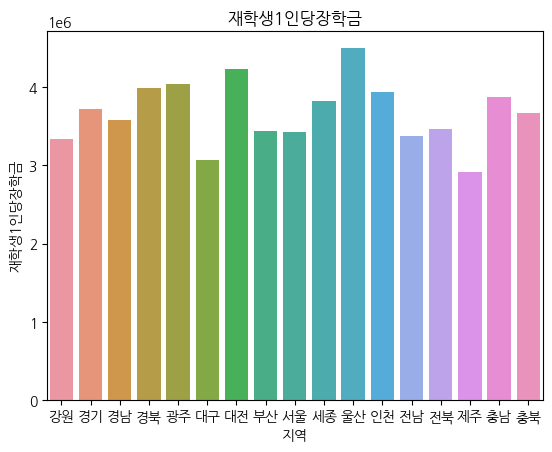

In [ ]:
sns.barplot(x="지역",y="재학생1인당장학금",data=data_sa2)
plt.title("재학생1인당장학금")
plt.rc('font', size=15)
plt.show()

6) 지역의 일반화를 위해 대학교의 수가 10개 초과인 지역선별

In [ ]:
data2.groupby('지역').count()

,index,학교종류,설립구분,학교명,재학생\n(A),장학금현황,성적우수장학금,재학생1인당장학금
지역,,,,,,,,
강원,11,11,11,11,11,11,11,11
경기,35,35,35,35,35,35,35,35
경남,9,9,9,9,9,9,9,9
경북,18,18,18,18,18,18,18,18
광주,10,10,10,10,10,10,10,10
대구,3,3,3,3,3,3,3,3
대전,12,12,12,12,12,12,12,12
부산,13,13,13,13,13,13,13,13
서울,42,42,42,42,42,42,42,42


In [ ]:
df2 = data2.groupby('지역').filter(lambda x: len(x) > 10)
df2.groupby('지역').count()

,index,학교종류,설립구분,학교명,재학생\n(A),장학금현황,성적우수장학금,재학생1인당장학금
지역,,,,,,,,
강원,11,11,11,11,11,11,11,11
경기,35,35,35,35,35,35,35,35
경북,18,18,18,18,18,18,18,18
대전,12,12,12,12,12,12,12,12
부산,13,13,13,13,13,13,13,13
서울,42,42,42,42,42,42,42,42
충남,15,15,15,15,15,15,15,15
충북,11,11,11,11,11,11,11,11


#일반화 지역별 재학생 1인당 장학금

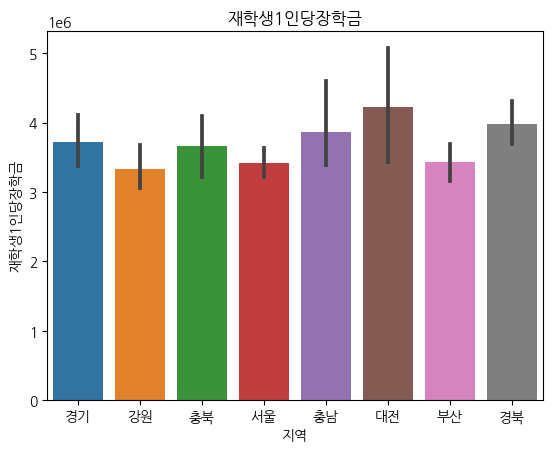

In [ ]:
sns.barplot(x="지역",y="재학생1인당장학금",data=df2)
plt.title("재학생1인당장학금")
plt.rc('font', size=10)
plt.show()

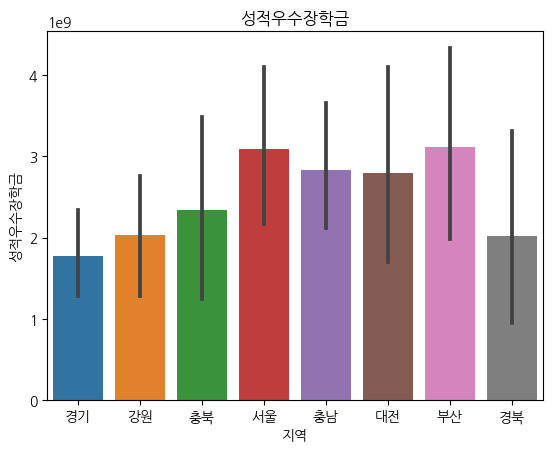

In [ ]:
sns.barplot(x="지역",y="성적우수장학금",data=df2)
plt.title("성적우수장학금")
plt.rc('font', size=10)
plt.show()

<Axes: xlabel='지역'>

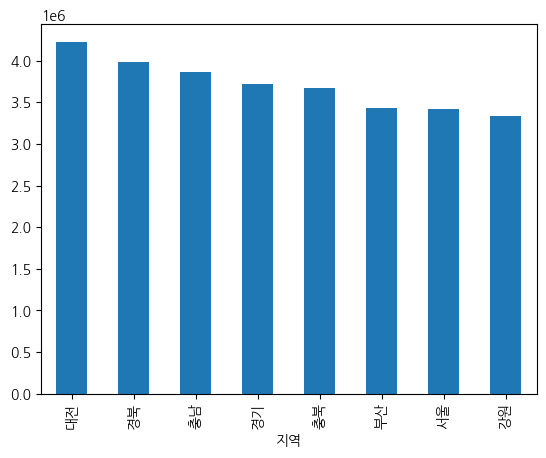

In [ ]:
g=df2.groupby(["지역"])["재학생1인당장학금"].mean().sort_values(ascending = False)
g.plot.bar()

<Axes: xlabel='지역'>

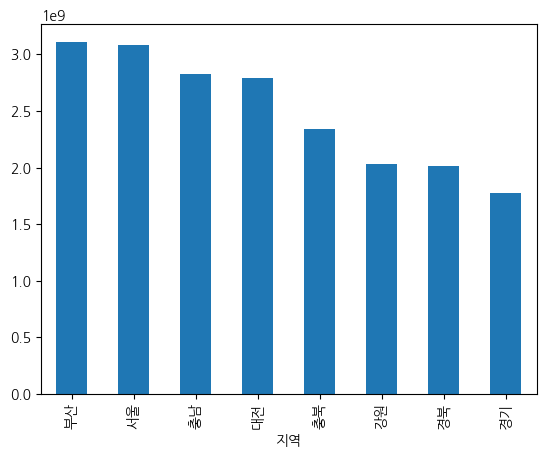

In [ ]:
g=df2.groupby(["지역"])["성적우수장학금"].mean().sort_values(ascending = False)
g.plot.bar()

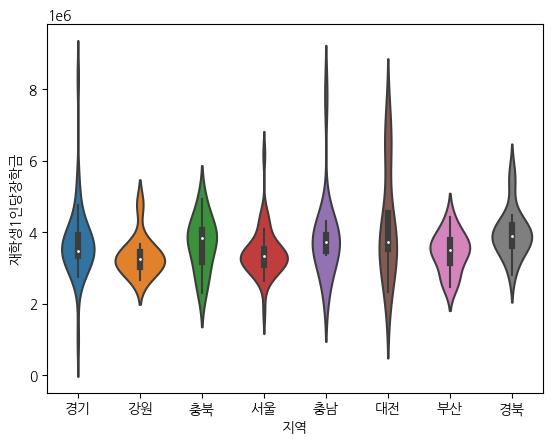

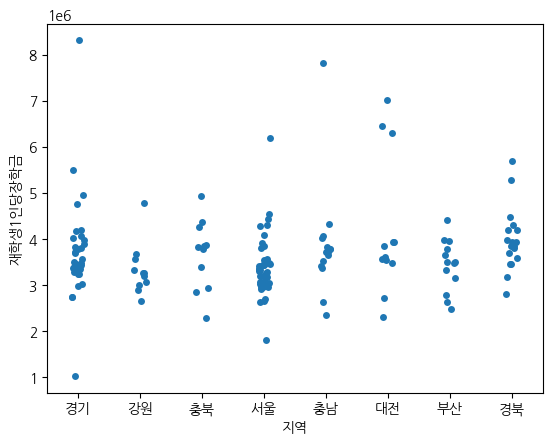

In [ ]:
sns.violinplot(x="지역",y="재학생1인당장학금",data=df2)
plt.show()
sns.stripplot(x="지역",y="재학생1인당장학금",data=df2)
plt.show()
#sns.boxplot(x="지역",y="성적우수장학금",data=data_sa2)
#plt.show()